In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('max_columns', 100)
plt.style.use('ggplot')

In [2]:
seattle_weather = pd.read_csv('seattle_weather.csv')
seattle_weather = seattle_weather.query('STATION == "USC00456295"')
austin_weather = pd.read_csv('austin_weather.csv')
climate_change = pd.read_csv('climate_change.csv', parse_dates=['date'], index_col='date')
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
summer2016 = pd.read_csv('summer2016.csv', index_col=0)
mens_rowing = summer2016.query('Sport == "Rowing"')
mens_gymnastic = summer2016.query('Sport == "Gymnastics"')

# Matplotlib

## single plot

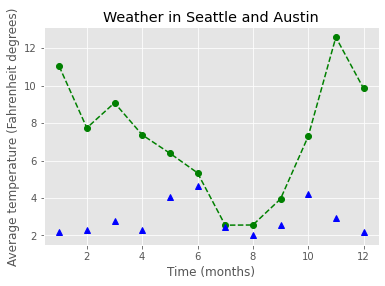

In [23]:
fig, ax = plt.subplots()

ax.plot(
    seattle_weather['DATE'], seattle_weather["MLY-PRCP-NORMAL"],
    marker="o", 
    linestyle="--",
    color='green'
)

ax.plot(
    austin_weather['DATE'], austin_weather["MLY-PRCP-NORMAL"],
    marker='^',
    linestyle='None',
    color='b'
)

ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (Fahrenheit degrees)")
ax.set_title("Weather in Seattle and Austin")

plt.show()

## subplots

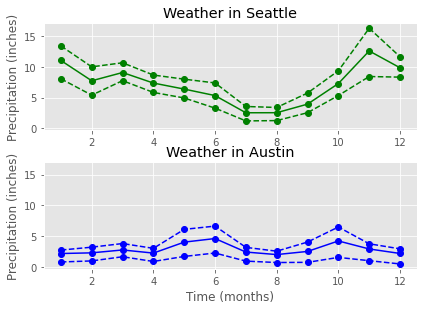

In [24]:
fig, ax = plt.subplots(2,1, sharey=True)
fig.tight_layout()
ax[0].plot(seattle_weather['DATE'], seattle_weather["MLY-PRCP-NORMAL"], marker="o", color='green')
ax[0].plot(seattle_weather['DATE'], seattle_weather["MLY-PRCP-25PCTL"], marker="o", linestyle="--", color='green')
ax[0].plot(seattle_weather['DATE'], seattle_weather["MLY-PRCP-75PCTL"], marker="o", linestyle="--",color='green')

ax[1].plot(austin_weather['DATE'], austin_weather["MLY-PRCP-NORMAL"], marker="o", color='blue')
ax[1].plot(austin_weather['DATE'], austin_weather["MLY-PRCP-25PCTL"], marker="o", linestyle="--", color='blue')
ax[1].plot(austin_weather['DATE'], austin_weather["MLY-PRCP-75PCTL"], marker="o", linestyle="--",color='blue')

ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")
ax[1].set_xlabel("Time (months)")

ax[0].set_title('Weather in Seattle')
ax[1].set_title('Weather in Austin')

plt.show()

## one plot with different y axes

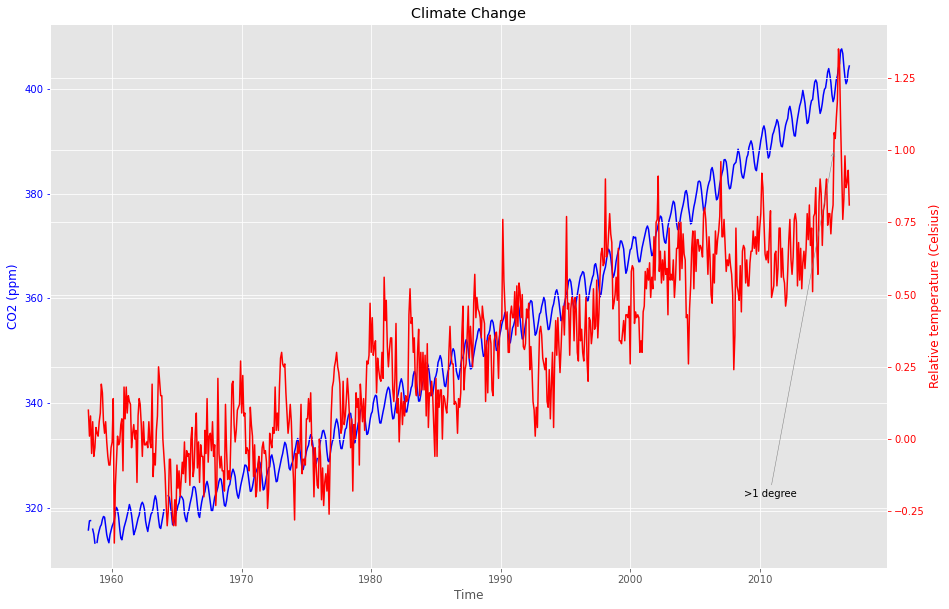

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(climate_change.index, climate_change['co2'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='blue')
ax.tick_params('y', colors='blue')

ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
ax2.tick_params('y', colors='red')
ax2.annotate(">1 degree", xy=[pd.Timestamp("2015-10-06"), 1],
             xytext=(pd.Timestamp('2008-10-06'), -0.2),
             arrowprops={"arrowstyle":"->", "color":"gray"})

ax.set_title('Climate Change')
plt.show()

## stacked barplot

C:\Users\moema\anaconda3\envs\py37_titanic\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


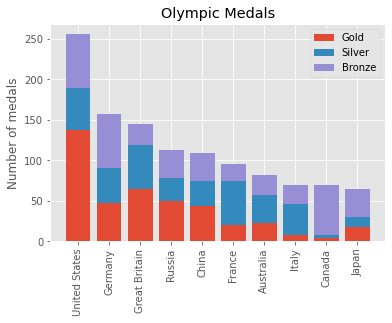

In [35]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"], label='Gold')
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label='Silver')
ax.bar(medals.index, medals["Bronze"],
       bottom=medals["Gold"] + medals["Silver"], label='Bronze')
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")
ax.set_title('Olympic Medals')
ax.legend()
plt.show()

## histohram

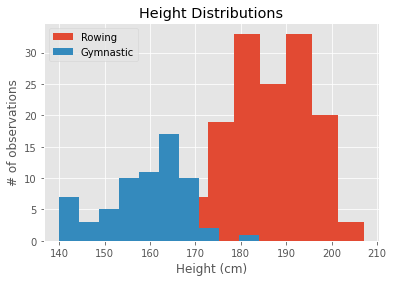

In [53]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label="Rowing", bins=10)
ax.hist(mens_gymnastic["Height"], label="Gymnastic", bins=10)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
ax.set_title('Height Distributions')
plt.show()

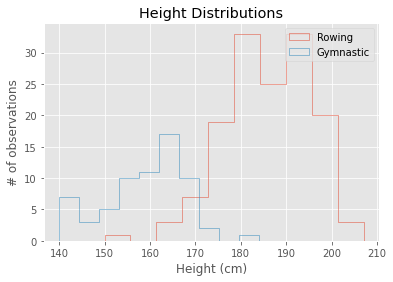

In [54]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label="Rowing", bins=10, histtype="step")
ax.hist(mens_gymnastic["Height"], label="Gymnastic", bins=10, histtype="step")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
ax.set_title('Height Distributions')
plt.show()

## error bars in a bar chart

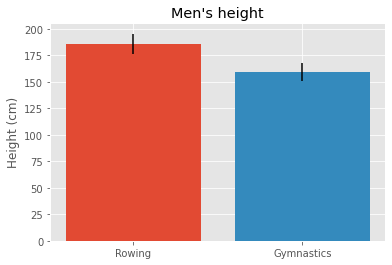

In [60]:
fig, ax = plt.subplots()
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())
ax.set_ylabel("Height (cm)")
ax.set_title("Men's height")
plt.show()

## error bars in a plot chart

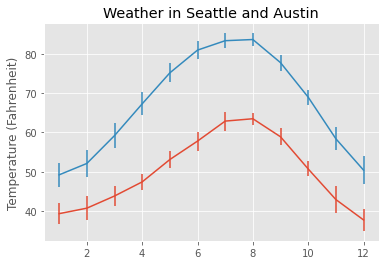

In [64]:
fig, ax = plt.subplots()
ax.errorbar(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])
ax.errorbar(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])
ax.set_ylabel("Temperature (Fahrenheit)")
ax.set_title('Weather in Seattle and Austin')
plt.show()

## boxplot

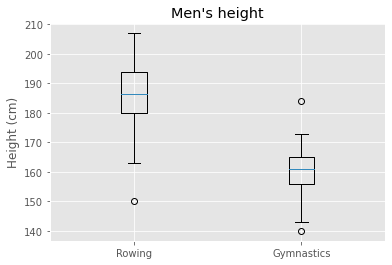

In [67]:
fig, ax = plt.subplots()
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])
ax.set_xticklabels(["Rowing","Gymnastics"])
ax.set_ylabel("Height (cm)")
ax.set_title("Men's height")
plt.show()

## scatter plot

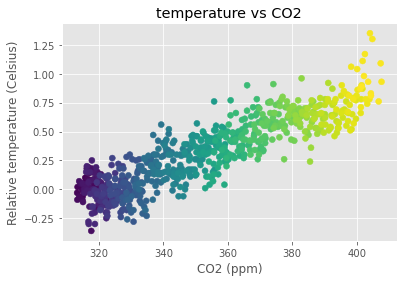

In [70]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
ax.set_title('temperature vs CO2')
plt.show()

# Seaborn

In [3]:
survey = pd.read_csv('young-people-survey-responses.csv', index_col=0)
alcohol = pd.read_csv('student-alcohol-consumption.csv', index_col=0)

In [4]:
survey.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [5]:
alcohol.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


## countplot

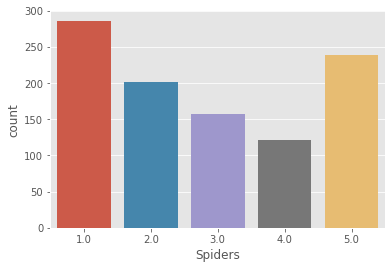

In [6]:
sns.countplot(data=survey, x='Spiders')
plt.show()

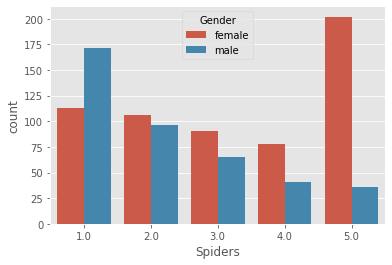

In [7]:
sns.countplot(data=survey, x='Spiders', hue='Gender')
plt.show()

## scatterplot

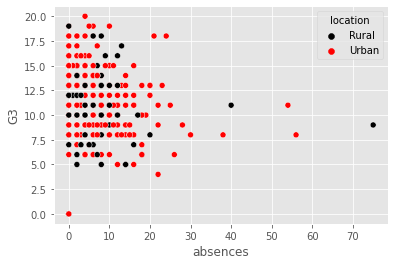

In [8]:
hue_colors = {"Rural": "black", "Urban": "red"}
sns.scatterplot(data=alcohol, x='absences', y="G3", hue='location', hue_order=['Rural', 'Urban'], palette=hue_colors)
plt.show()

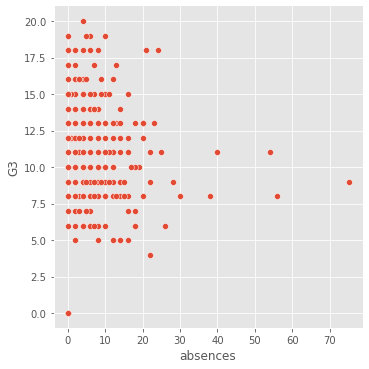

In [9]:
sns.relplot(
    x="absences",
    y="G3",
    data=alcohol,
    kind="scatter")

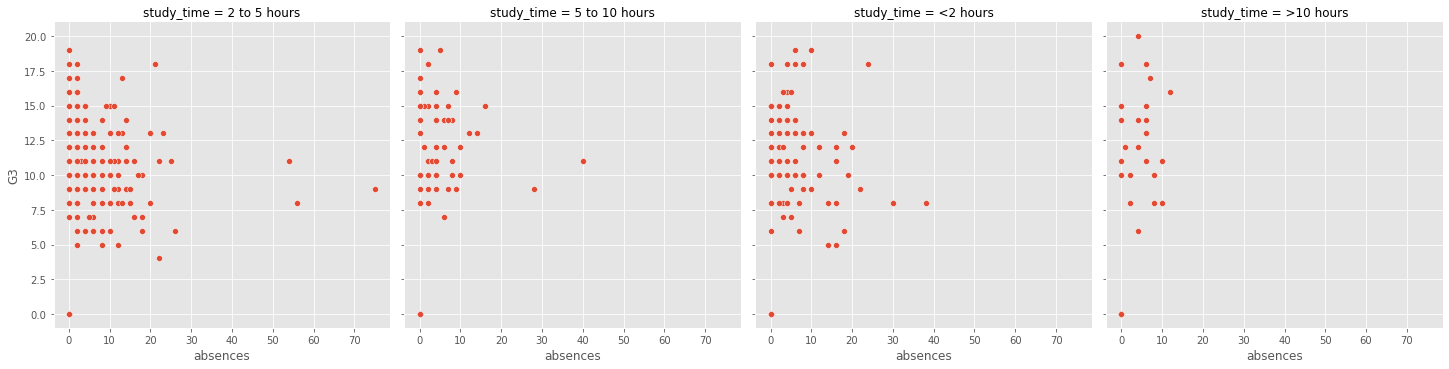

In [10]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=alcohol,
            kind="scatter",
            col="study_time")

# Show plot
plt.show()

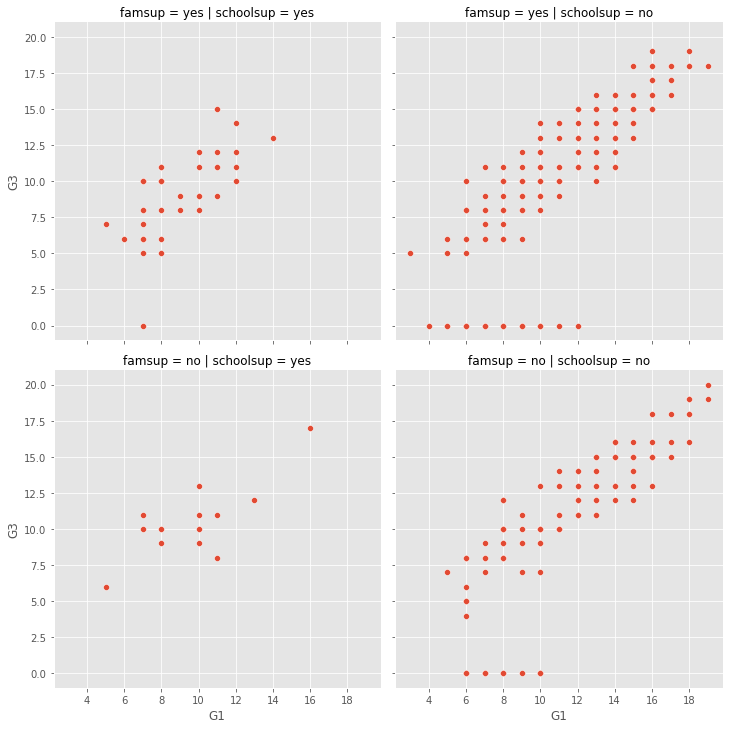

In [11]:
# Create a scatter plot of G1 vs. G3
sns.relplot(
    data=alcohol, 
    x="G1", 
    y="G3", 
    kind="scatter",
    col="schoolsup",
    col_order=['yes', 'no'],
    row="famsup",
    row_order=["yes", "no"])

# Show plot
plt.show()

In [12]:
mpg = pd.read_csv('mpg.csv', index_col=0)
mpg.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
mpg,,,,,,,,
18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


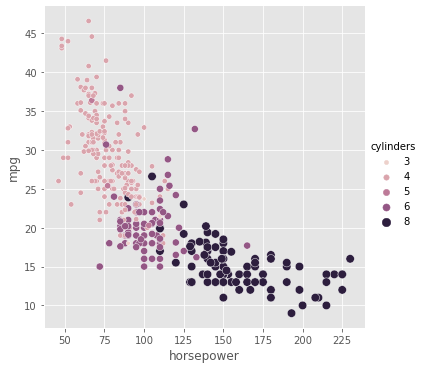

In [13]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(
    data=mpg,
    x="horsepower",
    y="mpg",
    kind="scatter",
    size="cylinders",
    hue="cylinders"
)



# Show plot
plt.show()

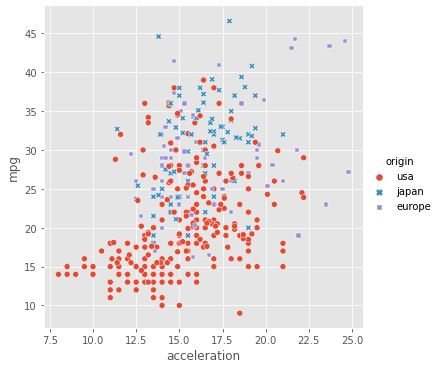

In [14]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(
    data=mpg,
    x="acceleration",
    y="mpg",
    kind="scatter",
    style="origin",
    hue="origin"
)



# Show plot
plt.show()

## line plot

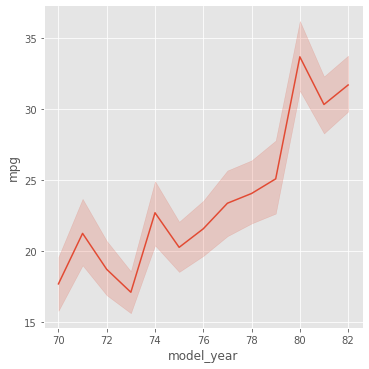

In [15]:
# Create line plot
sns.relplot(
    data=mpg,
    x="model_year",
    y="mpg",
    kind="line"
)


# Show plot
plt.show()

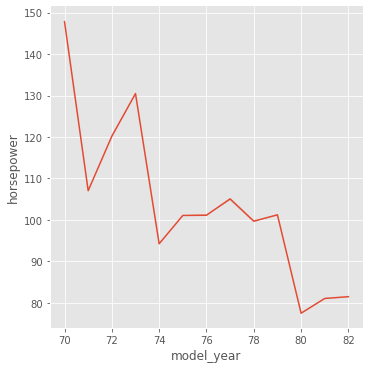

In [16]:
# Create line plot of model year vs. horsepower
sns.relplot(
    data=mpg,
    x="model_year",
    y="horsepower",
    ci=False,
    kind="line"
)



# Show plot
plt.show()

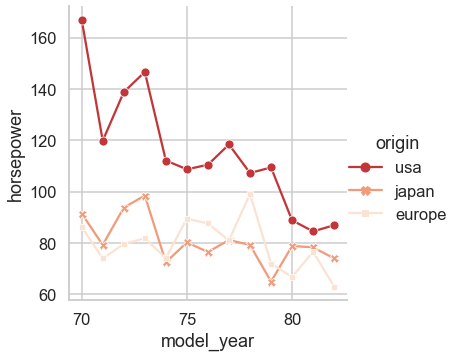

In [44]:
# Add markers and make each line have the same style
g = sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin",
            markers=True,
            dashes=False)

plt.show()

## category plots

In [18]:
survey_data = pd.read_csv('young-people-survey-responses.csv', index_col=0)

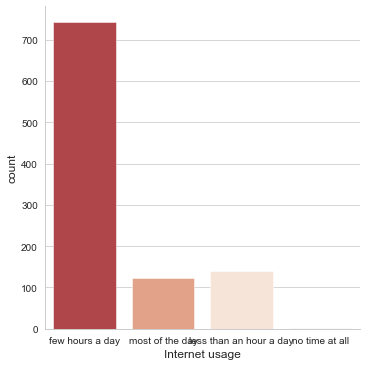

In [37]:
# Create count plot of internet usage
sns.set_palette("RdBu")
sns.catplot(
    data=survey_data,
    x="Internet usage",
    kind="count"
)


# Show plot
plt.show()

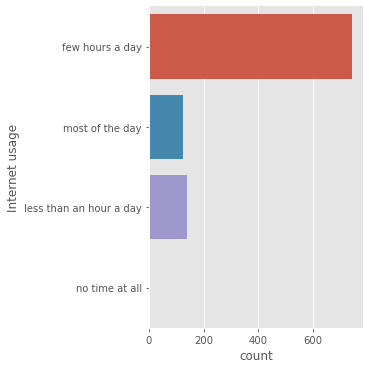

In [20]:
# Create count plot of internet usage
sns.catplot(
    data=survey_data,
    y="Internet usage",
    kind="count"
)


# Show plot
plt.show()

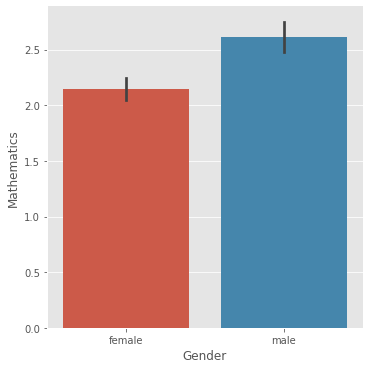

In [23]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(
    data=survey_data,
    x="Gender",
    y="Mathematics",
    kind="bar"
)


# Show plot
plt.show()

## box plot

In [24]:
student_data = pd.read_csv('student-alcohol-consumption.csv', index_col=0)

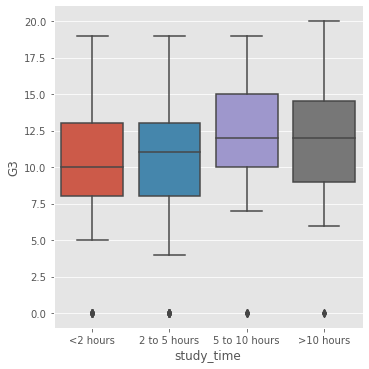

In [25]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(
    data=student_data,
    x="study_time",
    y="G3",
    order=study_time_order,
    kind="box"
)




# Show plot
plt.show()

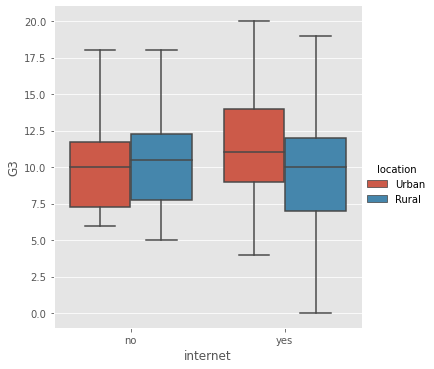

In [26]:
# Create a box plot with subgroups and omit the outliers

sns.catplot(
    data=student_data,
    x="internet",
    y="G3",
    hue="location",
    kind="box",
    sym=""
)




# Show plot
plt.show()

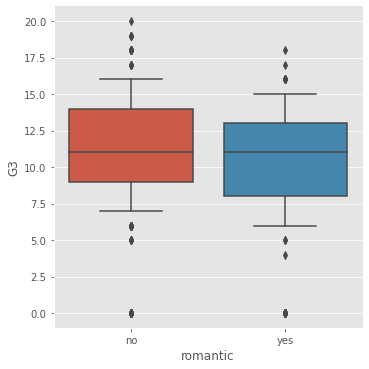

In [28]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=0.5)

# Show plot
plt.show()

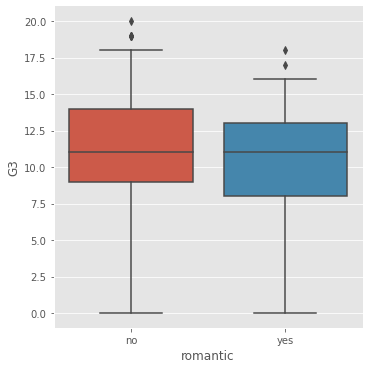

In [29]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[5,95])

# Show plot
plt.show()

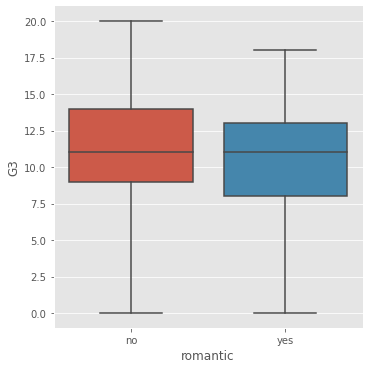

In [30]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

## point plot

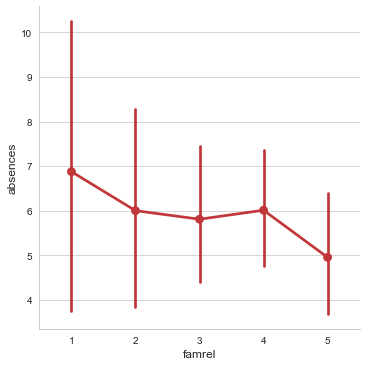

In [36]:
# Create a point plot of family relationship vs. absences
sns.set_palette("RdBu")
sns.catplot(
    data=student_data,
    x="famrel",
    y="absences",
    kind="point"
)


            
# Show plot
plt.show()

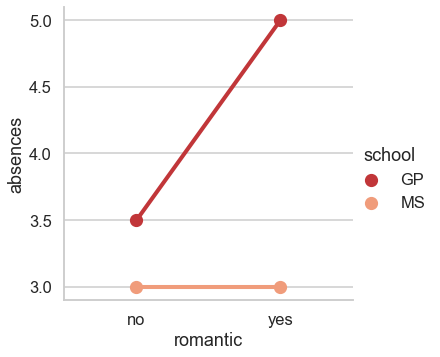

In [38]:
# Import median function from numpy
from numpy import median
sns.set_context("talk")
sns.set_style("whitegrid")
# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None,
            estimator=median)

# Show plot
plt.show()

## customize seaborn plots

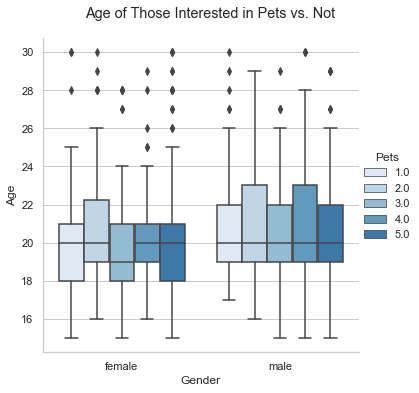

In [50]:
# Set palette to "Blues"
sns.set_palette("Blues")
sns.set_context('notebook')

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue="Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not", y=1.05)

# Show plot
plt.show()

In [47]:
survey_data.columns

Index(['Music', 'Techno', 'Movies', 'History', 'Mathematics', 'Pets',
       'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')

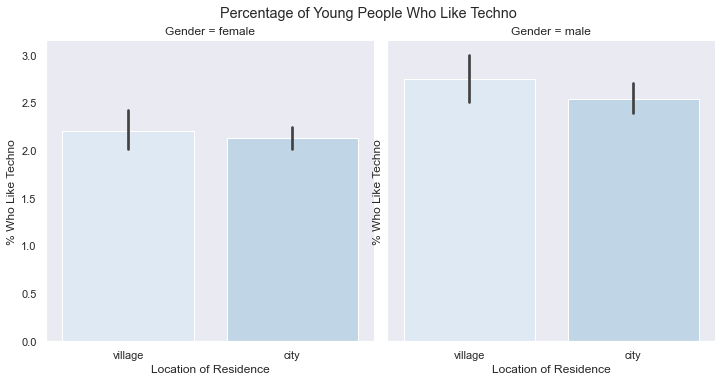

In [52]:
# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()